CONSIGNES

1° définir l'espace des états

2° les probabilités de transitions et la loi initiale

3° Vérifier l'existence théorique d'une loi stationnaire

4° Calculer la loi stationnaire

5° Simuler le jeu sur une grande période et vérifier numériquement la propriété de la stationnarité et les résultats qui en édcoulent.

6° Valider numériquement les propriétés théoriques de la chaîne Markov

Processus choisis: Processus d'ito standar puis processus d'Ornstein-Uhlenbeck

  processus de base :  dx = a*dt+ b*dZ ou Z est un mouvement brownien standard a et b sont constant: répond à la questions :définir les espaces d'états:
sachant que
on part d'une base S=100 à l'initial
les variations minimal sont de 0.1
on considère des variations en temps en jour ouvrée du marché ( 252 jours par ans)



$$E={S
min,S
min
 +ΔS,S
min
 +2ΔS,…,S
max
 },$$

 soit $$E={50.1,50.2,50.3,…,150.0}.$$.  

 donc 10001 états possible pour notre cours

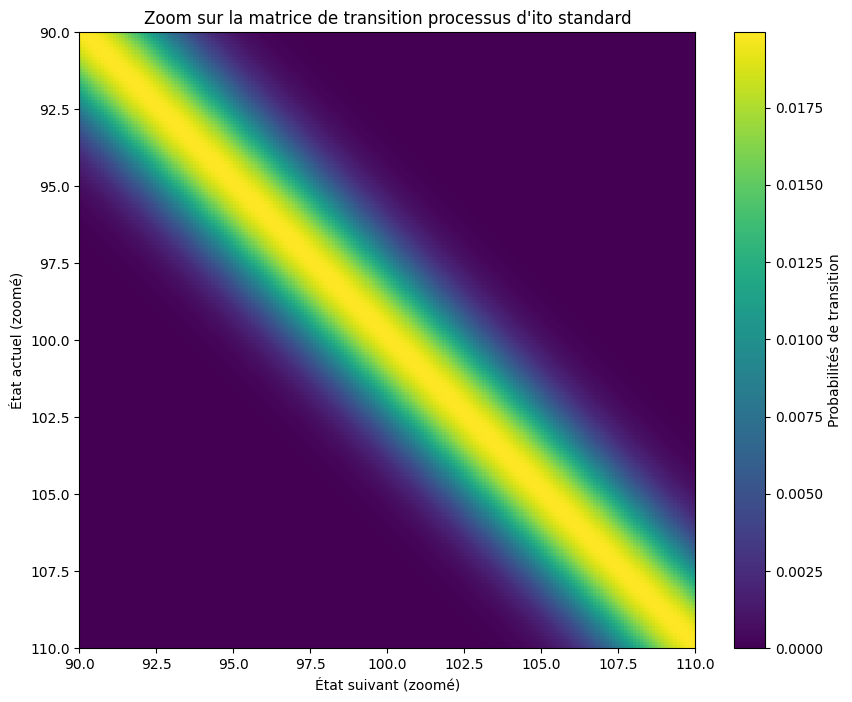

0.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf


def transition_matrix(a, b, xmin, xmax, dx, dt):

    states = np.arange(xmin, xmax + dx, dx)
    n_states = len(states)
    P = np.zeros((n_states, n_states))

    for i in range(n_states):
        x = states[i]
        mean = x + a * dt
        std = b * np.sqrt(dt)
        for j in range(n_states):
            if j == 0:
                P[i, j] = 0.5 * (1 + erf((states[j] - mean) / (std * np.sqrt(2))))
            elif j == n_states - 1:
                P[i, j] = 1 - 0.5 * (1 + erf((states[j - 1] - mean) / (std * np.sqrt(2))))
            else:
                P[i, j] = 0.5 * (erf((states[j] - mean) / (std * np.sqrt(2))) - erf((states[j - 1] - mean) / (std * np.sqrt(2))))


        P[i, :] /= np.sum(P[i, :])

    return states, P



a = 10  # Terme de dérive
b = 20  # Terme de diffusion
xmin = 50.0  # Borne inférieure
xmax = 150.0  # Borne supérieure
dx = 0.1  # Pas de discrétisation
dt = 0.01  # Pas de temps


states, P = transition_matrix(a, b, xmin, xmax, dx, dt)


x_min_zoom = 90.0
x_max_zoom = 110.0


idx_min_zoom = np.searchsorted(states, x_min_zoom)
idx_max_zoom = np.searchsorted(states, x_max_zoom)
P_zoom = P[idx_min_zoom:idx_max_zoom, idx_min_zoom:idx_max_zoom]
states_zoom = states[idx_min_zoom:idx_max_zoom]


plt.figure(figsize=(10, 8))
plt.imshow(P_zoom, cmap="viridis", extent=[x_min_zoom, x_max_zoom, x_max_zoom, x_min_zoom])
plt.colorbar(label="Probabilités de transition")
plt.title("Zoom sur la matrice de transition processus d'ito standard")
plt.xlabel("État suivant (zoomé)")
plt.ylabel("État actuel (zoomé)")
plt.show()



print(np.linalg.det(P))



La formule pour la matrice de transition d'un processus stochastique de type \$ dx = a \, dt + b \, dZ \$ où a est un terme de dérive constant,  b  est un terme de diffusion constant, et $ dZ $ est un incrément d'un mouvement brownien repose sur l'idée de discrétiser ce processus dans le temps et l'espace d'état.

### 1. Processus stochastique continu :
Le processus \$ dx = a \, dt + b \, dZ \$ est une équation différentielle stochastique (EDS) qui décrit un mouvement brownien avec dérive.

- Drift  a  : Cela représente la tendance ou le changement moyen du processus au fil du temps.
- Diffusion b  : Cela représente l'intensité de la volatilité ou de la fluctuation du processus autour de sa dérive, modélisée par un mouvement brownien $dZ$ , qui est une variable aléatoire suivant une distribution normale centrée de variance $dt$.

### 2. Discrétisation dans le temps :
Lorsqu'on cherche à simuler un tel processus sur un intervalle de temps discret avec un pas de temps $dt$, on remplace l'élément $dZ$ par un incrément aléatoire tiré d'une loi normale ${N}(0, \sqrt{dt})$, c'est-à-dire :

$$
dZ \sim \mathcal{N}(0, \sqrt{dt})
$$

Cela signifie qu'à chaque instant $ t $, l'évolution du processus $ x(t)$ est donnée par :

$$
x(t + dt) = x(t) + a \, dt + b \, \sqrt{dt} \, \xi
$$

où$ \xi $ est une variable aléatoire suivant une distribution normale standard $\ \mathcal{N}(0, 1) $.

### 3. Discrétisation de l'espace d'état :
Le processus stochastique décrit une évolution continue dans le temps et l'espace. Pour construire la matrice de transition, on doit discrétiser l'espace d'état  x  en un certain nombre d'états discrets $ x_1, x_2, \dots, x_n $, où la distance entre ces états est définie par un pas $dx$.

La matrice de transition $ P $ donne la probabilité de transition du processus d'un état $ x_i $ à un état $ x_j $ après un pas de temps  dt .

### 4. Calcul des probabilités de transition :
Étant donné que le processus est décrit par un mouvement brownien, la probabilité de passer de l'état $ x_i $ à un état $x_j $ est donnée par la fonction de densité de probabilité de la distribution normale pour les incréments du mouvement brownien.

Soit $ x(t) $ l'état du processus à l'instant $ t $. Pour passer de l'état $ x_i $ à $ x_j $ au temps $ t+dt $, l'état $ x_j $ doit être obtenu à partir de $ x_i $ en prenant en compte la dérive et la diffusion. La transition suit une loi normale de moyenne $ x_i + a dt $ et de variance $ b^2 \, dt $.

La probabilité de transition de $ x_i $ à $ x_j $ est donc la probabilité qu'une variable aléatoire normalement distribuée de moyenne $ x_i + a \, dt $ et de variance $ b^2 \, dt $ prenne la valeur $ x_j $. Cette probabilité est donnée par la fonction de répartition de la loi normale :

$$
P(x_i \to x_j) = \Phi\left(\frac{x_j - (x_i + a \, dt)}{b \sqrt{dt}}\right) - \Phi\left(\frac{x_{i-1} - (x_i + a \, dt)}{b \sqrt{dt}}\right)
$$

où $( \Phi(\cdot))$ est la fonction de répartition de la loi normale standard, $$ \Phi(z) = \frac{1}{2} \left(1 + \text{erf}\left(\frac{z}{\sqrt{2}}\right)\right) $$, et  $x_i-1 $ est l'état précédent xi.

### 5. Matrice de transition :
La matrice de transition $ P $ est donc une matrice carrée où chaque élément $ P(i, j) $ représente la probabilité de passer de l'état $ x_i $ à l'état $ x_j $ après un pas de temps $ dt $.

Les probabilités de transition sont calculées pour chaque paire d'états $ x_i$ et $ x_j $, et la matrice est ensuite normalisée pour que la somme des probabilités de transition depuis un état donné soit égale à 1.


# Preuve mathématique que l'espérance d'un processus d'Itô diverge pour un drift non nul

### Processus d'Itô :
Le processus d'Itô est donné par l'équation stochastique suivante :
$$
    dX_t = \mu(X_t, t) dt + \sigma(X_t, t) dW_t,
$$
ou :
- $ \mu(X_t, t) $ représente le terme de drift (dérive).
- $ \sigma(X_t, t) $ représente le terme de volatilité.
- $ W_t $ est un mouvement brownien standard.

Nous supposons que le drift $ \mu $ et la volatilité $ \sigma $ sont constants :
$$
    dX_t = \mu dt + \sigma dW_t.
$$

### Espérance du processus :
Prenons l'espérance de chaque côté de l'équation stochastique. En utilisant la linéarité de l'espérance et le fait que $ \mathbb{E}[dW_t] = 0 $ (car $ W_t $ est un mouvement brownien standard) :
$$
    \mathbb{E}[dX_t] = \mathbb{E}[\mu dt] + \mathbb{E}[\sigma dW_t].
$$
Cela donne :
$$
    \mathbb{E}[dX_t] = \mu dt.
$$

Posons $$ m(t) = \mathbb{E}[X_t] $$, alors :
$$
    dm(t) = \mu dt.
$$

Intégrons cette équation différentielle entre $ t = 0 $ et $ t $ :
$$
    m(t) - m(0) = \mu \int_0^t dt.
$$
Puisque $ m(0) = \mathbb{E}[X_0] = X_0 $, nous obtenons :
$$
    m(t) = X_0 + \mu t.
$$

### Conclusion :
L'espérance du processus $ X_t $ est donc :
$
    \mathbb{E}[X_t] = X_0 + \mu t.
$
Si $ \mu \neq 0 $, l'espérance diverge linéairement avec le temps. Par conséquent, le processus $ X_t $ ne peut pas avoir de loi stationnaire, car une loi stationnaire implique que les moments (comme l'espérance) soient constants dans le temps.

### Variance du processus :
De même, en étudiant la variance $ \text{Var}(X_t) $, nous savons que le terme de diffusion (proportionnel à $ \sigma $) contribue comme suit :
$
    \text{Var}(X_t) = \sigma^2 t.
$
La variance croît également indéfiniment avec le temps, renforçant l'absence de stationnarité.

### Remarque :
En résumé, pour un processus d'Itô avec un drift constant non nul :
- L'espérance diverge linéairement :
$$
    \mathbb{E}[X_t] = X_0 + \mu t.
$$
- La variance augmente linéairement :
$$
    \text{Var}(X_t) = \sigma^2 t.
$$
Ainsi, le processus ne peut pas être stationnaire.


théorème de frobenius: si VP (rayon spectral est la valeur propre alors elle est égale à 1) car somme sur une ligne = 1 et matrice irréductible et positive

donc comme 1 est la seule vp possible il suffit d'avoir det(P)= 0 c'est le cas

# Processus de Ornstein–Uhlenbeck

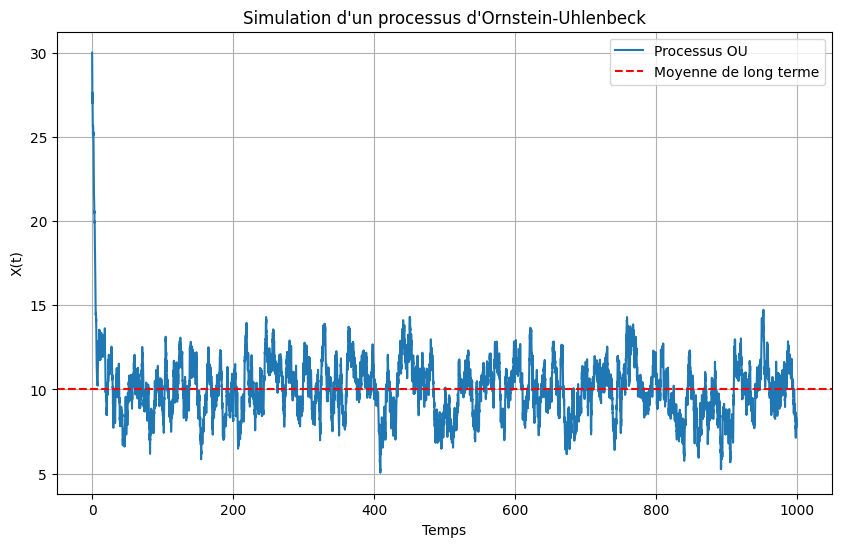

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du processus
theta = 0.2  # Vitesse de retour
mu = 10      # Moyenne de long terme
sigma = 1   # Volatilité
x0 = 30     # Valeur initiale
T = 1000        # Durée de la simulation
dt = 0.1     # Pas de temps
N = int(T / dt)  # Nombre d'étapes

time = np.linspace(0, T, N)
X = np.zeros(N)
X[0] = x0


for i in range(1, N):
    Z = np.random.normal(0, 1)
    X[i] = X[i-1] + theta * (mu - X[i-1]) * dt + sigma * np.sqrt(dt) * Z


plt.figure(figsize=(10, 6))
plt.plot(time, X, label="Processus OU")
plt.axhline(mu, color='r', linestyle='--', label="Moyenne de long terme")
plt.title("Simulation d'un processus d'Ornstein-Uhlenbeck")
plt.xlabel("Temps")
plt.ylabel("X(t)")
plt.legend()
plt.grid()
plt.show()


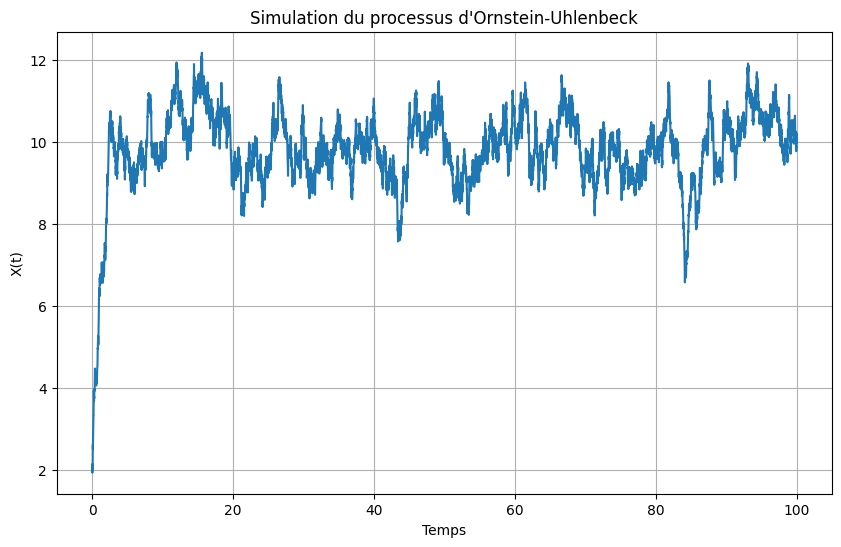

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_ou_process(mu, theta, sigma, X0, T, N):
    dt = T / N
    t = np.linspace(0, T, N + 1)
    X = np.zeros(N + 1)
    X[0] = X0

    for n in range(N):
        dW = np.random.normal(0, np.sqrt(dt))
        X[n + 1] = X[n] + theta * (mu - X[n]) * dt + sigma * dW

    return t, X


mu = 10  # Moyenne
theta = 0.7  # Vitesse de retour
sigma = 1  # Volatilité
X0 = 2  # Condition initiale
T = 100  # Temps final
N = 10000  # Nombre de pas de discrétisation

t, X = simulate_ou_process(mu, theta, sigma, X0, T, N)

plt.figure(figsize=(10, 6))
plt.plot(t, X)
plt.title("Simulation du processus d'Ornstein-Uhlenbeck")
plt.xlabel("Temps")
plt.ylabel("X(t)")
plt.grid(True)
plt.show()


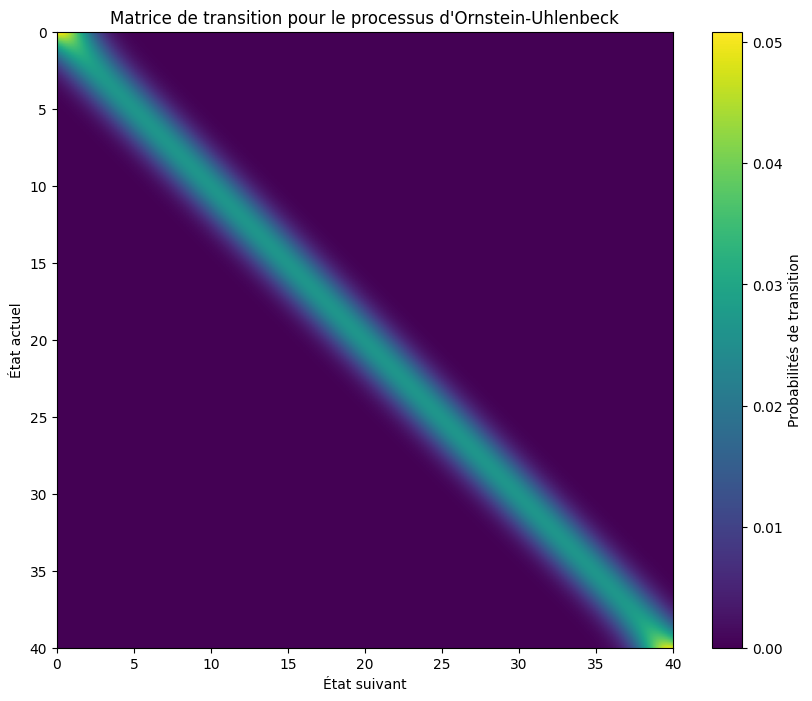

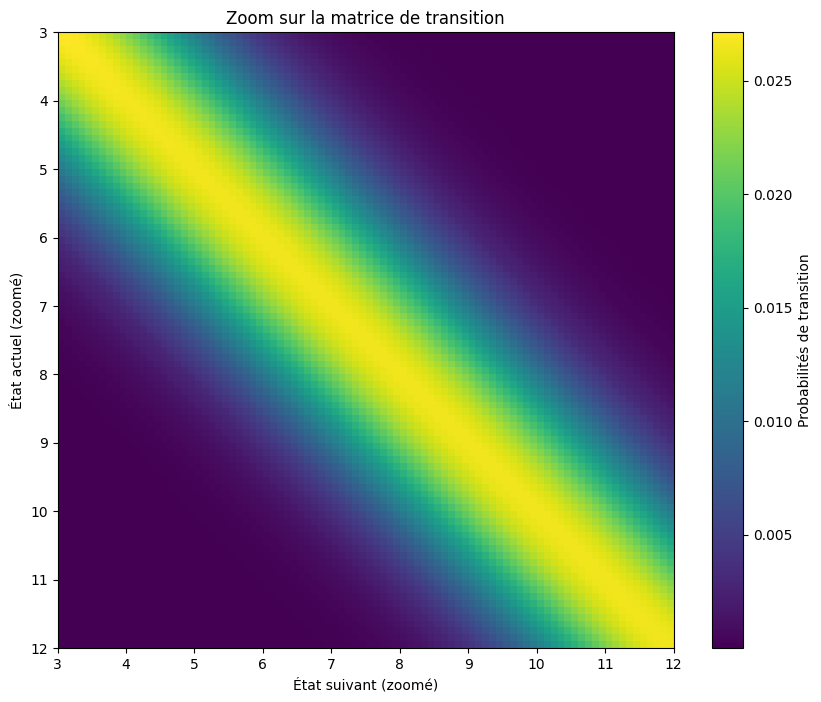

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

def transition_matrix_ou(theta, mu, sigma, xmin, xmax, dx, dt):

    states = np.arange(xmin, xmax + dx, dx)
    n = len(states)
    P = np.zeros((n, n))

    for i in range(n):
        x = states[i]
        mean_next = x + theta * (mu - x) * dt
        std_next = sigma * np.sqrt(dt)

        for j in range(n):
            x_next = states[j]
            #if j == 0:
               # P[i, j] = 0.5 * (1 + erf((x_next + dx / 2 - mean_next) / (std_next * np.sqrt(2))))
           # elif j == n - 1:
            #    P[i, j] = 1 - 0.5 * (1 + erf((x_next - dx / 2 - mean_next) / (std_next * np.sqrt(2))))
            #else:
            P[i, j] = 0.5 * (
                    erf((x_next + dx / 2 - mean_next) / (std_next * np.sqrt(2))) -
                    erf((x_next - dx / 2 - mean_next) / (std_next * np.sqrt(2)))
                )

        # Normalisation pour garantir que la somme des probabilités = 1
        P[i, :] /= np.sum(P[i, :])

    return states, P

    return states, P

# Paramètres pour le processus d'Ornstein-Uhlenbeck
theta = 0.5  # Taux de réversion
mu = 7.0  # Moyenne de réversion
sigma = 15  # Volatilité
xmin = 0.0  # Borne inférieure de l'espace d'état
xmax = 40.0  # Borne supérieure de l'espace d'état
dx = 0.1  # Pas de discrétisation en espace
dt = 0.01  # Pas de temps


states, P = transition_matrix_ou(theta, mu, sigma, xmin, xmax, dx, dt)
plt.figure(figsize=(10, 8))
plt.imshow(P, cmap="viridis", extent=[xmin, xmax, xmax, xmin])
plt.colorbar(label="Probabilités de transition")
plt.title("Matrice de transition pour le processus d'Ornstein-Uhlenbeck")
plt.xlabel("État suivant")
plt.ylabel("État actuel")
plt.show()


x_min_zoom = 3.0
x_max_zoom = 12.0
idx_min_zoom = np.searchsorted(states, x_min_zoom)
idx_max_zoom = np.searchsorted(states, x_max_zoom)
P_zoom = P[idx_min_zoom:idx_max_zoom, idx_min_zoom:idx_max_zoom]
states_zoom = states[idx_min_zoom:idx_max_zoom]

plt.figure(figsize=(10, 8))
plt.imshow(P_zoom, cmap="viridis", extent=[x_min_zoom, x_max_zoom, x_max_zoom, x_min_zoom])
plt.colorbar(label="Probabilités de transition")
plt.title("Zoom sur la matrice de transition")
plt.xlabel("État suivant (zoomé)")
plt.ylabel("État actuel (zoomé)")
plt.show()



### 1. Modèle du processus d'Ornstein-Uhlenbeck

Le processus d'Ornstein-Uhlenbeck est régi par l'équation différentielle stochastique (EDS) :

$$
dX_t = \theta (\mu - X_t) dt + \sigma dW_t,
$$

où :
- $\theta$ est le taux de réversion (force avec laquelle le processus revient vers la moyenne $\mu$),
- $\mu$ est la moyenne vers laquelle le processus converge,
- $\sigma$ est l'intensité de la diffusion (variabilité due au bruit),
- $W_t$ est un mouvement brownien standard.

### 2. Discrétisation de l'EDS

Pour obtenir une approximation numérique, on discrétise l'EDS en utilisant la méthode d'Euler-Maruyama avec un pas de temps $\Delta t$. Cela donne :

$$
X_{n+1} = X_n + \theta (\mu - X_n) \Delta t + \sigma \sqrt{\Delta t} Z_n,
$$

où $Z_n \sim \mathcal{N}(0, 1)$ (loi normale standard).

- Le premier terme $X_n$ représente la position actuelle.
- Le second terme $\theta (\mu - X_n) \Delta t$ est le terme de réversion vers la moyenne $\mu$.
- Le dernier terme $\sigma \sqrt{\Delta t} Z_n$ est le bruit stochastique associé au mouvement brownien.

Pour un état initial $x_i = X_n$, l'état suivant $X_{n+1}$ est une variable aléatoire suivant une loi normale :

$$
X_{n+1} \sim \mathcal{N}(\mu_{\text{next}}, \sigma_{\text{next}}^2),
$$

avec :
- Espérance $\mu_{\text{next}} = x_i + \theta (\mu - x_i) \Delta t$,
- Variance $\sigma_{\text{next}}^2 = \sigma^2 \Delta t$.

### 3. Probabilité de transition $P[i, j]$

La matrice de transition $P[i, j]$ correspond à la probabilité que le processus passe de l'état $x_i$ (discrétisé) à l'état $x_j$ en un pas de temps $\Delta t$. Cela se calcule en utilisant la distribution normale définie précédemment.

#### a. Définition de $P[i, j]$

La probabilité que $X_{n+1}$ tombe dans l'intervalle $[x_j - \frac{\Delta x}{2}, x_j + \frac{\Delta x}{2}]$ est donnée par :

$$
P[i, j] = \int_{x_j - \frac{\Delta x}{2}}^{x_j + \frac{\Delta x}{2}} f(x; \mu_{\text{next}}, \sigma_{\text{next}}) dx,
$$

où $f(x; \mu, \sigma)$ est la densité de probabilité d'une loi normale $\mathcal{N}(\mu, \sigma^2)$ :

$$
f(x; \mu, \sigma) = \frac{1}{\sqrt{2\pi} \sigma} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right).
$$

#### b. Utilisation de la fonction de répartition cumulative (CDF)

La CDF (fonction de répartition cumulative) de la loi normale est donnée par :

$$
\text{CDF}(x; \mu, \sigma) = \frac{1}{2} \left[ 1 + \text{erf}\left(\frac{x - \mu}{\sqrt{2} \sigma}\right) \right],
$$

où $\text{erf}(z)$ est la fonction d'erreur.

En utilisant la CDF, l'intégrale pour $P[i, j]$ peut être réécrite comme :

$$
P[i, j] = \text{CDF}\left(x_j + \frac{\Delta x}{2}; \mu_{\text{next}}, \sigma_{\text{next}}\right) - \text{CDF}\left(x_j - \frac{\Delta x}{2}; \mu_{\text{next}}, \sigma_{\text{next}}\right).
$$

### 4. Cas particuliers

- Si $j = 0$ (première colonne de $P$), l'intégrale commence à $-\infty$, ce qui correspond à :

$$
P[i, 0] = \text{CDF}\left(x_j + \frac{\Delta x}{2}; \mu_{\text{next}}, \sigma_{\text{next}}\right).
$$

- Si $j = N$ (dernière colonne de $P$), l'intégrale s'étend jusqu'à $+\infty$, ce qui correspond à :

$$
P[i, N] = 1 - \text{CDF}\left(x_{N-1} + \frac{\Delta x}{2}; \mu_{\text{next}}, \sigma_{\text{next}}\right).
$$

### 5. Normalisation

En pratique, des erreurs numériques peuvent s'accumuler. Pour garantir que chaque ligne de la matrice $P$ représente une distribution de probabilité valide (somme des probabilités = 1), on normalise chaque ligne :

$$
P[i, :] = \frac{P[i, :]}{\sum_j P[i, j]}.
$$



Théorème Soit {Xn : n ∈N}une chaîne de Markov de matrice de
transition P, recurrente irréductible. Alors il existe une mesure
strictement positive invariante π pour P, unique à une
constante multiplicative pres.
irréductible: de facon assez imédiate
récurrent: besoins d'une propriété qui n'est pas dans le cours disant que pour un processus de diffusion on a qu'il est récurrent si $$
\int_{-\infty}^{\infty} \frac{1}{\sigma^2(x)} dx = \infty
$$:
pour avoir$ \int_{-\infty}^{\infty} S(x) dx = \infty$
mais ici $ \sigma $ est une constant donc résulat directe
  on intègre la fonction de vitesse $ S(x)$
demander a Mme Fouladirad si possible d'utiliser le résultat

à ce momement là le théorème est valider on à l'existence de notre messure invariante

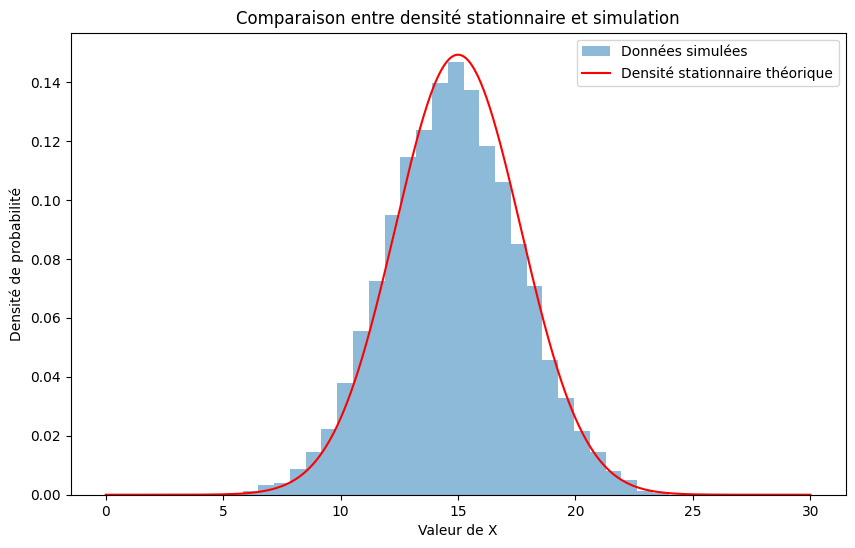

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation du processus d'Ornstein-Uhlenbeck
def simulate_ou(theta, mu, sigma, x0, T, dt):
    N = int(T / dt)  # Nombre de pas de temps
    x = np.zeros(N)
    x[0] = x0
    for i in range(1, N):
        dW = np.random.normal(0, np.sqrt(dt))
        x[i] = x[i - 1] + theta * (mu - x[i - 1]) * dt + sigma * dW
    return x

# Paramètres du processus
theta = 7
mu = 15
sigma = 10
x0 = 10.0
T = 100.0  # Temps total
dt = 0.01  # Pas de temps

# Simulation
x_sim = simulate_ou(theta, mu, sigma, x0, T, dt)



# Densité stationnaire théorique
x_vals = np.linspace(0, 30, 1000)
f_theoretical = (
    np.sqrt(theta / (np.pi * sigma**2))
    * np.exp(-theta * (x_vals - mu) ** 2 / sigma**2)
)

# Comparaison par histogramme
plt.figure(figsize=(10, 6))
plt.hist(x_sim, bins=30, density=True, alpha=0.5, label="Données simulées")
plt.plot(x_vals, f_theoretical, color="red", label="Densité stationnaire théorique")
plt.xlabel("Valeur de X")
plt.ylabel("Densité de probabilité")
plt.title("Comparaison entre densité stationnaire et simulation")
plt.legend()
plt.show()
